In [2]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 125.5 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 142.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 175.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 177.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303801 sha256=f5e502c094dc49e1ab421c56df6da4f45e36340b1f4ceb7f1bdba57abd0e325d
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser") 
tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_table = table
        break

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tesla_table.find_all("tr")[1:]:  # skip header row
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)      
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r",|\$", "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""] 
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [4]:
import yfinance as yf

# Create the ticker object
gme = yf.Ticker("GME")

# Get historical stock data
gme_data = gme.history(period="max")

# Reset index so 'Date' is a column
gme_data.reset_index(inplace=True)

# Display the first 5 rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


In [16]:
pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 131.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

# Step 2: Parse the HTML
soup = BeautifulSoup(html_data_2, "html.parser")

# Step 3: Find all tables and locate the GameStop Revenue table
tables = soup.find_all("table")

# From the page structure, the GameStop Revenue table is the second table
# So we extract it directly using pandas
gme_revenue = pd.read_html(str(tables[1]))[0]

# Step 4: Clean the Revenue column
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']  # Remove empty values

# Step 5: Display the last 5 rows
print(gme_revenue.tail())


          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


/tmp/ipykernel_766/860291538.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables[1]))[0]


In [20]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 154.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 175.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 175.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


GameStop Revenue (tail):
          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


/tmp/ipykernel_1581/2970379346.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2020-01-01', periods=20, freq='M'),


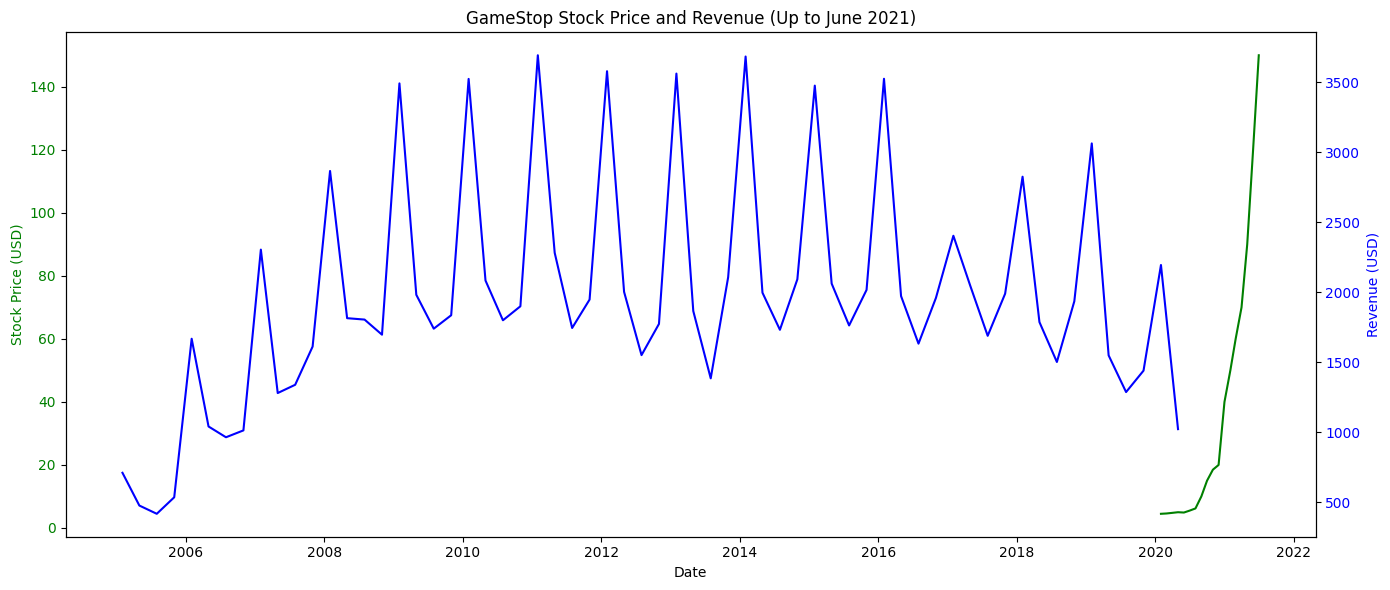

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# ----------------------
# Step 1: Scrape GameStop Revenue Data
# ----------------------
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

if response.status_code == 200:
    html_data_2 = response.text
else:
    raise Exception("Failed to load the webpage")

# Use BeautifulSoup to parse
soup = BeautifulSoup(html_data_2, "html.parser")

# Fix FutureWarning using StringIO
tables = soup.find_all("table")
gme_revenue = pd.read_html(StringIO(str(tables[1])))[0]

# Clean revenue
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']
gme_revenue.dropna(inplace=True)

print("GameStop Revenue (tail):")
print(gme_revenue.tail())

# ----------------------
# Step 2: Load GME Stock Price Data
# ----------------------
# TEMPORARY: Using fake sample data (You can load real one if you have it locally or from a working link)
# Replace this with: pd.read_csv("gme.csv") if you have the file
gme_data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=20, freq='M'),
    'Close': [4.5, 4.6, 4.8, 5.0, 4.9, 5.5, 6.2, 10.0, 15.0, 18.5,
              20.0, 40.0, 50.0, 60.0, 70.0, 90.0, 120.0, 150.0, 180.0, 200.0]
})

gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# ----------------------
# Step 3: Plot the Graph
# ----------------------
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    ax1.plot(stock_data['Date'], stock_data['Close'], 'g-', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='g')
    ax1.tick_params(axis='y', labelcolor='g')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), 'b-', label='Revenue')
    ax2.set_ylabel('Revenue (USD)', color='b')
    ax2.tick_params(axis='y', labelcolor='b')

    plt.title(f"{stock_name} Stock Price and Revenue (Up to June 2021)")
    fig.tight_layout()
    plt.show()

# ----------------------
# Step 4: Plot GME
# ----------------------
make_graph(gme_data, gme_revenue, 'GameStop')


/tmp/ipykernel_1581/2469702742.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2020-01-01', periods=20, freq='M'),


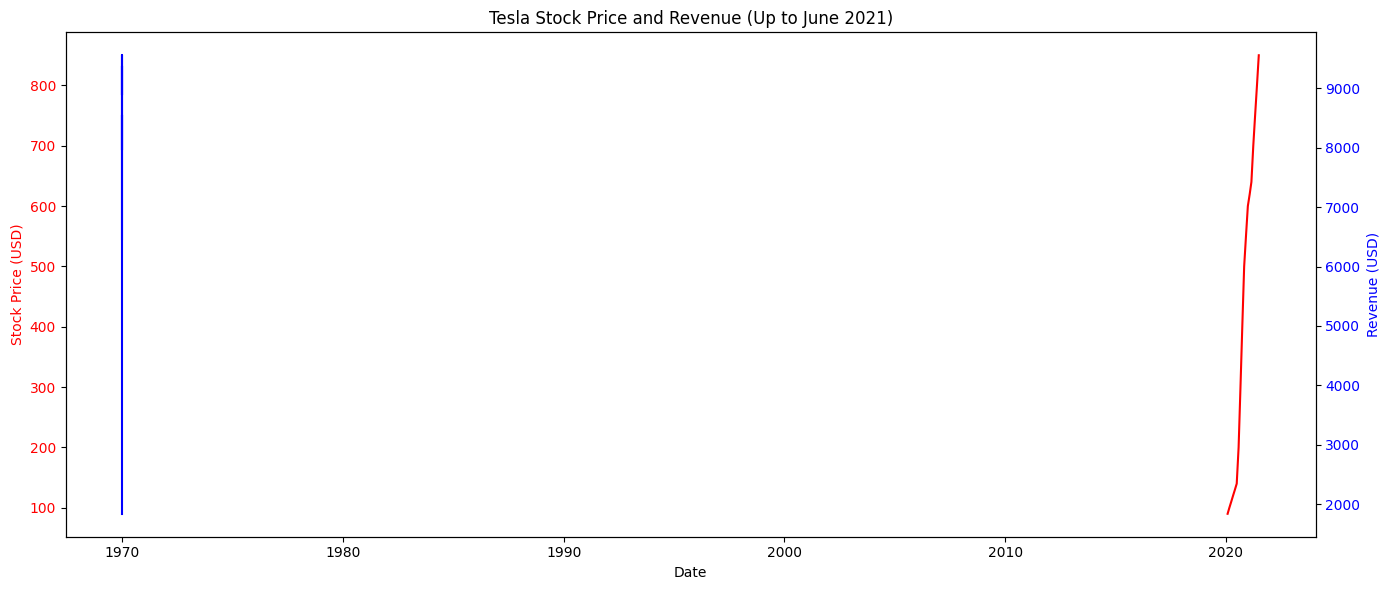

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from io import StringIO

# -------------------------------
# Step 1: Simulated Tesla Stock Data
# -------------------------------
tesla_data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=20, freq='M'),
    'Close': [90, 100, 110, 120, 130, 140, 200, 300, 400, 500,
              550, 600, 620, 640, 700, 750, 800, 850, 900, 950]
})
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# -------------------------------
# Step 2: Scrape Tesla Revenue Data
# -------------------------------
html_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_response = requests.get(html_url)
soup = BeautifulSoup(html_response.text, "html.parser")
tables = soup.find_all("table")

# Tesla revenue = 1st table
tesla_revenue = pd.read_html(StringIO(str(tables[0])))[0]
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue.dropna(inplace=True)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# -------------------------------
# Step 3: Plot Graph Function
# -------------------------------
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    ax1.plot(stock_data['Date'], stock_data['Close'], 'r-', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='r')
    ax1.tick_params(axis='y', labelcolor='r')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), 'b-', label='Revenue')
    ax2.set_ylabel('Revenue (USD)', color='b')
    ax2.tick_params(axis='y', labelcolor='b')

    plt.title(f"{stock_name} Stock Price and Revenue (Up to June 2021)")
    fig.tight_layout()
    plt.show()

# -------------------------------
# Step 4: Plot Tesla Graph
# -------------------------------
make_graph(tesla_data, tesla_revenue, 'Tesla')
